<h1><font color=green> Data Preprocessing</font></h1>

<p>Data preprocessing is a process transforming raw data into a clean, organized format that's suitable for machine learning models.</p>

<p>This process is crucial because:</p>
<ul>
    <li>It improves data quality, leading to better accuracy and increased efficiency in machine learning model results.</li>
    <li>It prepares the data in a format that machine learning algorithms can understand and work with efficiently.</li>
    <li>
        <p>Real-world data is often messy, containing: </p>
        <ul>
            <li>
                Noise, irrelevant data points that do not provide meaningful information. For Example A passenger’s age recorded as 300 or -10 would be considered noise.
            </li>
            <li>Missing values, These are data points that are absent or not recorded in the dataset such as (NaN, None)</li>
            <li>Duplicate samples, Two identical records for the same passenger in the Titanic dataset, with the same name, age, and other details.</li>
            <li>Incorrect data, For example, the value entered for month is likely to be a number from 1 to 12</li>
            <li>Inconsistencies, This refers to data that follows inconsistent formatting, for Example In a dataset of birthdays, some dates might be formatted as MM/DD/YYYY while others are DD-MM-YYYY, creating inconsistency in the date format.</li>
            <li>Unsuitable formats, This refers to data that is not in a format that can be directly input into machine learning algorithms like categorical features, text, image, ...</li>
        </ul>
    </li>
</ul>

<p>Preprocessing is essential for building effective Machine Learning models, as it makes data suitable for analysis and modeling.</p>

<h3>1. Importing libraries</h3>

<p>Popular Python libraries:</p>
<ul>
    <li><strong>NumPy</strong>: short for Numerical Python, is the most basic and a powerful package used for numerical operations.</li>
    <li><strong>Pandas</strong>: pandas is used for data manipulation and analysis, It provides rich data structures and functions designed to make working with structured data fast, easy, and expressive.</li>
    <li><strong>Seaborn</strong> and <strong>Matplotlib</strong>: matplotlib is the most popular Python library for producing plots and other 2D data visualizations.</li>
    <li><strong>SciPy</strong>: is a collection of packages addressing a number of different standard problem domains in scientific computing</li>
    <li><strong>sklearn.preprocessing</strong> provides tools for encoding categorical data, including LabelEncoder and OneHotEncoding</li>
    <li><strong>sklearn.preprocessing</strong> provides tools for Scaling Features, including StandardScaler, MinMaxScaler</li>
</ul>

In [1]:
%matplotlib inline
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

<h3>2. Importing the dataset</h3>
<p>
    Titanic dataset is a common dataset that contains information about passengers on the Titanic, including whether they survived or not, Here are some key features:
</p>
<ul>
    <li><strong>PassengerId</strong>: Unique ID for each passenger</li>
    <li><strong>Survived</strong>: Target variable contains Whether the passenger survived(1 = survived, 0 = did not survive)</li>
    <li><strong>Pclass</strong>: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd class)</li>
    <li><strong>Name</strong>: Name of the passenger</li>
    <li><strong>Sex</strong>: Gender of the passenger</li>
    <li><strong>Age</strong>: Age of the passenger</li>
    <li><strong>SibSp</strong>: Number of siblings/spouses aboard</li>
    <li><strong>Parch</strong>: Number of parents/children aboard</li>
    <li><strong>Ticket</strong>: Ticket number</li>
    <li><strong>Fare</strong>: Fare paid for the ticket</li>
    <li><strong>Cabin</strong>: Cabin number</li>
    <li><strong>Embarked</strong>: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>

In [2]:
Titanic_Data = pd.read_csv('../data/Titanic_Data.csv', delimiter=',')

<h3>3. Visualization, Exploring and Understanding the Dataset</h3>

In [3]:
# Take a quick look at the first few rows of the dataset
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To find the number of rows and number of columns in your dataset
print(Titanic_Data.shape)

(891, 12)


In [5]:
# To known what are the columns in your dataset
Titanic_Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Calculate the value counts
value_counts = Titanic_Data['Survived'].value_counts()
print(f"Not Survived(0): {value_counts[0]}")
print(f"Survived(1): {value_counts[1]}")

Not Survived(0): 549
Survived(1): 342


In [7]:
# A better way to automatically do this for all possible values in a column
for value in Titanic_Data['Survived'].unique():
    print(f"Value: {value}, Number of occurence: {value_counts[value]}")

Value: 0, Number of occurence: 549
Value: 1, Number of occurence: 342


Text(0.5, 1.0, 'Survived count \n (0: Survived; 1: Not survived")')

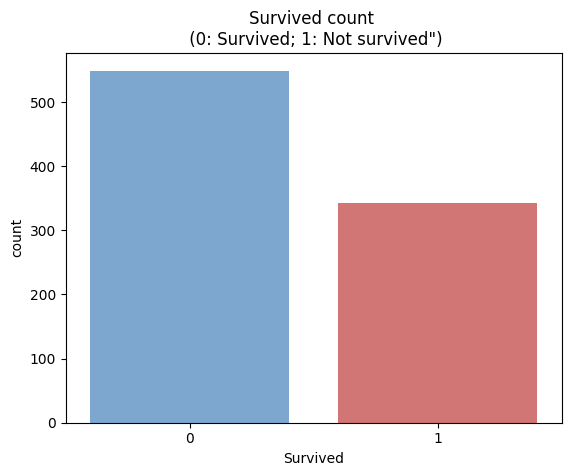

In [8]:
# Display a bar plot for how many instances we have for each class in the Target feature (Survived)
custom_palette = ['#6FA8DC', '#E06666']


graph = sns.countplot(x='Survived', data=Titanic_Data, hue='Survived', palette=custom_palette, legend=False)

# Plot Settings
plt.title('Survived count \n (0: Survived; 1: Not survived")')

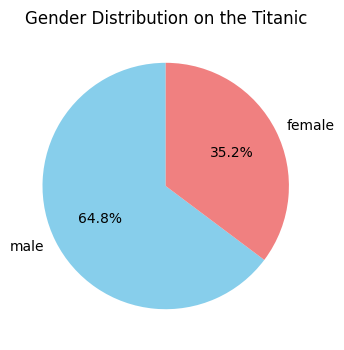

In [9]:
# Create the pie chart for Gender Distribution
gender_counts = Titanic_Data['Sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution on the Titanic')
plt.show()

<h3>4. Display the relation between the Gender and survived Passenger </h3>

In [10]:
# Select the two columns and Group by Gender then calculate the mean of 'Survived'
class_survival = Titanic_Data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

# Sort by the survival rate
class_survival = class_survival.sort_values(by='Survived', ascending=False)

display(class_survival)

,Sex,Survived
0,female,0.742038
1,male,0.188908


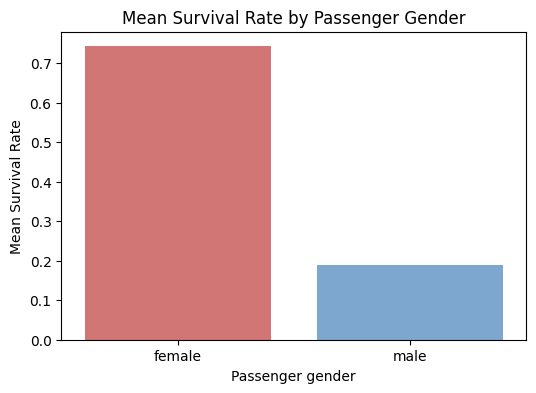

In [11]:
# Plot a bar chart to show mean survival by Sex

custom_palette1 = ['#6FA8DC', '#E06666']

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=class_survival, hue='Survived', palette=custom_palette1, legend=False)

# Add titles and labels
plt.title('Mean Survival Rate by Passenger Gender')
plt.xlabel('Passenger gender')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()

<h3>5. Display the relation between the Pclass and survived Passenger </h3>

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


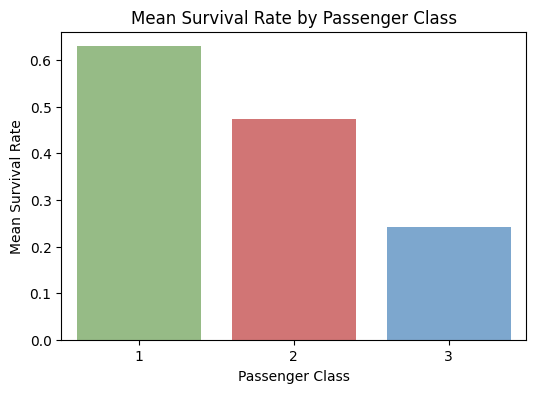

In [12]:
# Group by 'Pclass' and calculate the mean of 'Survived'
class_survival = Titanic_Data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

# Sort by the survival rate
class_survival = class_survival.sort_values(by='Survived', ascending=False)

display(class_survival)

# Plot a bar chart to show mean survival by Pclass
custom_palette = ['#6FA8DC', '#E06666', '#93C47D']
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Survived', data=class_survival, palette=custom_palette, legend=False)

# Add titles and labels
plt.title('Mean Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()

<h3>6. Usefull Built-in Methods</h3>

In [13]:
# Check basic information about the dataset (columns, null values, data types)
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Get the number of null values in the dataset
Titanic_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# The describe method calculate basic statistics on each column/feature in the dataset
Titanic_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>7. Cleaning the Dataset</h3>

<ul>
    <li>7.1 Delete duplicate samples</li>
    <li>7.2 Handling  missing Data (NaN value) (dropna, fillno). We'll first remove rows with a high percentage of null values, then remove columns with a high percentage of null values.</li>
    <li>7.3 Delete Irrelevant Features(PassengerId, Name, and Ticket).</li>
    <li>7.4 Handling an unsuitable format by encoding category data by using OneHotEncoding or label encoding<br/>OneHotEncoding which generates binary columns for each category while label encoding provides each category a unique numeric label.</li>
</ul>

<h4>7.1 Delete duplicate samples</h4>

In [16]:
# Check duplicated rows
duplicated_rows = Titanic_Data[Titanic_Data.duplicated(keep=False)]
duplicated_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [17]:
# delete all the duplicated rows by keeping the first one and droping the rest 
Titanic_Data = Titanic_Data.drop_duplicates(keep='first')

<h4>7.2 Handling Missing Data</h4>
<ul>
    <li>Drop rows where all values are null</li>
    <li>Drop columns where all values are null</li>
    <li>Dropping rows with missing values for most of the columns (70 percent)</li>
    <li>Dropping columns with  missing values for most of the columns (70 percent)</li>
</ul>

In [18]:
print("Before rows:", len(Titanic_Data), "columns:", Titanic_Data.shape[1])

# Drop rows where all values are null
Titanic_Data.dropna(how='all', inplace=True)

# Drop columns where all values are null
Titanic_Data.dropna(axis=1, how='all', inplace=True)

# Dropping rows with missing values for most of the columns (70 percent)
row_threshold = int(len(Titanic_Data.columns) * 0.4)
Titanic_Data.dropna(axis=0, thresh=row_threshold, inplace=True)

# Dropping columns with missing values for most of the columns (70 percent)
col_threshold = int(len(Titanic_Data) * 0.7)
Titanic_Data.dropna(axis=1, thresh=col_threshold, inplace=True)

print("After rows:", len(Titanic_Data), "columns:", Titanic_Data.shape[1])

Before rows: 891 columns: 12
After rows: 891 columns: 11


In [19]:
Titanic_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [20]:
# To decide whether to use the mean, median, or mode for filling missing values in a dataset (the type of data and its distribution, numerical or categorical)

# For Age we will use median could have outliers (very young or very old passengers), which would skew the mean. 
Titanic_Data['Age'] = Titanic_Data['Age'].fillna(Titanic_Data['Age'].median())

# For Embarked feature ('S', 'C', 'Q') representing different embarkation ports, we will use 'mode' the most frequent embarkation point is used.
Titanic_Data['Embarked'] = Titanic_Data['Embarked'].fillna(Titanic_Data['Embarked'].mode()[0])

In [21]:
Titanic_Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<h4>7.3 Delete Irrelevant Features(PassengerId, Name, and Ticket).</h4>
<p>These columns are not useful for model training or data preprocessing</p>

In [23]:
# Drop columns: PassengerId, Name, and Ticket
Titanic_Data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

<h4>7.4 Handling an unsuitable format by encoding category data by using OneHotEncoding or label encoding</h4>

<p>OneHotEncoding generates binary columns for each category while label encoding provides each category a unique numeric label.</p>

In [24]:
Titanic_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
# Label Encoding for 'Sex' column
le = LabelEncoder()
Titanic_Data['Sex'] = le.fit_transform(Titanic_Data['Sex'])

In [26]:
Titanic_Data1 = pd.get_dummies(Titanic_Data, columns=['Embarked'], drop_first=True)

In [27]:
Titanic_Data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [28]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'Embarked' column
embarked_encoded = encoder.fit_transform(Titanic_Data[['Embarked']])

# Convert to DataFrame
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Concatenate with original DataFrame
Titanic_Data2 = pd.concat([Titanic_Data, embarked_encoded_df], axis=1)

# Drop original 'Embarked' column
Titanic_Data2.drop(columns=['Embarked'], inplace=True)

In [29]:
Titanic_Data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [30]:
# The original data before applying one hot encoding
Titanic_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


<h3>8. Feature Scaling</h3>
<p>
    Feature scaling includes StandardScaler, MinMaxScaler<br/>
    Feature scaling should be applied after splitting your data into training and testing sets.
</p>
<ul>
    <li><strong>StandardScaler</strong>: Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.</li>
    <li><strong>MinMaxScaler</strong>: Scales features to a fixed range, usually [0, 1].</li>
</ul>

In [31]:
# Correctly select the columns to scale
columns_to_scale = ['Age', 'Fare']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the selected columns
data_standard_scaled = standard_scaler.fit_transform(Titanic_Data2[columns_to_scale])

# Convert scaled data back to DataFrame with appropriate column names
data_standard_scaled_df = pd.DataFrame(data_standard_scaled, columns=columns_to_scale)

data_standard_scaled_df

,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


In [32]:
# Optionally, you can concatenate this scaled data with the rest of the original DataFrame
Titanic_Data2_scaled = pd.concat([Titanic_Data2.drop(columns=columns_to_scale), data_standard_scaled_df], axis=1)

Titanic_Data2_scaled

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,1,0,0.0,0.0,1.0,-0.565736,-0.502445
1,1,1,0,1,0,1.0,0.0,0.0,0.663861,0.786845
2,1,3,0,0,0,0.0,0.0,1.0,-0.258337,-0.488854
3,1,1,0,1,0,0.0,0.0,1.0,0.433312,0.420730
4,0,3,1,0,0,0.0,0.0,1.0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0.0,0.0,1.0,-0.181487,-0.386671
887,1,1,0,0,0,0.0,0.0,1.0,-0.796286,-0.044381
888,0,3,0,1,2,0.0,0.0,1.0,-0.104637,-0.176263
889,1,1,1,0,0,1.0,0.0,0.0,-0.258337,-0.044381


In [33]:
Titanic_Data2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<h3>9. Save the preprocessed and cleaned dataset</h3>

In [34]:
# This saves a dataframe to csv file.
Titanic_Data.to_csv("Titanc_Dataset_Cleaned.csv")